# Brain Tumor Classification

## Import Library

In [1]:
import numpy as np
import os
import cv2
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from skimage import exposure

## Load and Preprocess Training Data

In [3]:
datadir = "/kaggle/input/brain-tumor-mri-dataset/Training"
Categories = ["glioma", "meningioma", 'notumor', 'pituitary']
target_arr = []
feature_arr = []

for i in Categories:
    print(f'loading... category: {i}')
    path = os.path.join(datadir, i)

    for img in os.listdir(path):
        try:
            img_path = os.path.join(path, img)
            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if image is None:
                print(f"Failed to load image: {img_path}")
                continue

            # Preprocessing: Resize Image
            image_resized = cv2.resize(image, (64, 128))

            # Extract HOG features
            hog_features = hog(image_resized, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys')

            feature_arr.append(hog_features)
            target_arr.append(i)
            
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            continue

    print(f'loaded category: {i} successfully')

loading... category: glioma
loaded category: glioma successfully
loading... category: meningioma
loaded category: meningioma successfully
loading... category: notumor
loaded category: notumor successfully
loading... category: pituitary
loaded category: pituitary successfully


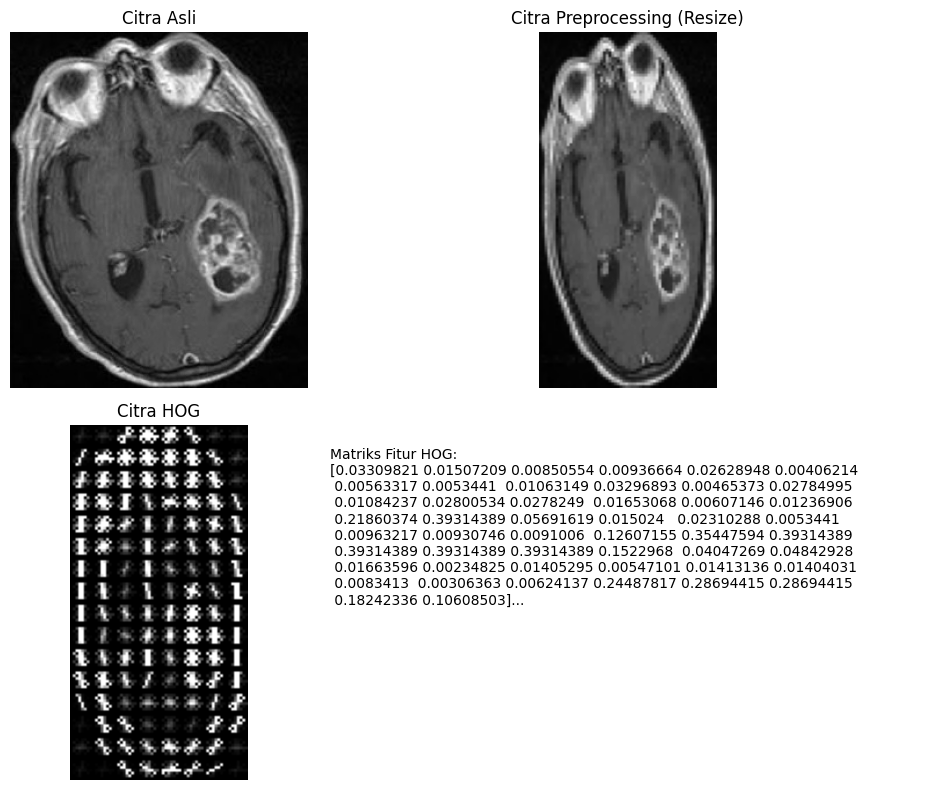

Matriks Fitur HOG (numerik) untuk Citra Tersebut:
[0.03309821 0.01507209 0.00850554 ... 0.00307547 0.00162091 0.        ]

Panjang vektor fitur HOG: 3780


In [4]:
image_path = '/kaggle/input/brain-tumor-mri-dataset/Testing/meningioma/Te-meTr_0001.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Asli')
plt.axis('off')

image_resized = cv2.resize(image, (64, 128))
plt.subplot(2, 2, 2)
plt.imshow(image_resized, cmap='gray')
plt.title('Citra Preprocessing (Resize)')
plt.axis('off')

hog_features, hog_image = hog(image_resized, pixels_per_cell=(8, 8),
                              cells_per_block=(2, 2), block_norm='L2-Hys',
                              visualize=True, feature_vector=True)

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

plt.subplot(2, 2, 3)
plt.imshow(hog_image_rescaled, cmap='gray')
plt.title('Citra HOG')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.axis('off')
plt.text(0, 0.5, f"Matriks Fitur HOG:\n{hog_features[:50]}...", fontsize=10, wrap=True)  # Menampilkan sebagian besar fitur

plt.tight_layout()
plt.show()

print("Matriks Fitur HOG (numerik) untuk Citra Tersebut:")
print(hog_features)
print("\nPanjang vektor fitur HOG:", len(hog_features))

## Convert Data to Numpy Arrays

In [5]:
X = np.array(feature_arr)
y = np.array(target_arr)

print("Feature array shape:", X.shape)
print("Target array shape:", y.shape)

Feature array shape: (5712, 3780)
Target array shape: (5712,)


## Load and Preprocess Testing Data

In [6]:
datadir = "/kaggle/input/brain-tumor-mri-dataset/Testing"
Categories = ["glioma", "meningioma", 'notumor', 'pituitary']
target_arr_test = []
feature_arr_test = []

for i in Categories:
    print(f'loading... category: {i}')
    path = os.path.join(datadir, i)

    for img in os.listdir(path):
        try:
            img_path = os.path.join(path, img)
            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if image is None:
                print(f"Failed to load image: {img_path}")
                continue

            image_resized = cv2.resize(image, (64, 128))
            hog_features = hog(image_resized, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys')

            feature_arr_test.append(hog_features)
            target_arr_test.append(i)

        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            continue

    print(f'loaded category: {i} successfully')

loading... category: glioma
loaded category: glioma successfully
loading... category: meningioma
loaded category: meningioma successfully
loading... category: notumor
loaded category: notumor successfully
loading... category: pituitary
loaded category: pituitary successfully


## Convert Testing Data to Numpy Arrays

In [7]:
X_test = np.array(feature_arr_test)
y_test = np.array(target_arr_test)

print("Feature array shape:", X_test.shape)
print("Target array shape:", y_test.shape)

Feature array shape: (1311, 3780)
Target array shape: (1311,)


## Data Normalization

In [8]:
# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Train SVM Model

In [9]:
model = svm.SVC(kernel='linear', class_weight='balanced', max_iter=100000)
model.fit(X, y)

SVC(class_weight='balanced', kernel='linear', max_iter=100000)

## Evaluate the Model

In [10]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.92372234935164

Classification Report:

              precision    recall  f1-score   support

      glioma       0.88      0.86      0.87       300
  meningioma       0.84      0.84      0.84       306
     notumor       0.99      1.00      1.00       405
   pituitary       0.96      0.97      0.97       300

    accuracy                           0.92      1311
   macro avg       0.92      0.92      0.92      1311
weighted avg       0.92      0.92      0.92      1311



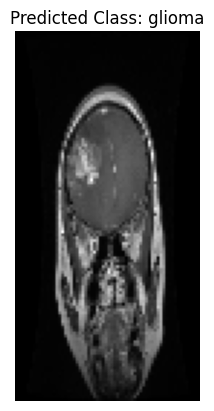

Predicted Class: glioma
True Label: glioma
Prediksi Benar!


In [11]:
# Coba citra untuk tes prediksi
test_image_path = '/kaggle/input/brain-tumor-mri-dataset/Training/glioma/Tr-glTr_0000.jpg'

image = cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE)
image_resized = cv2.resize(image, (64, 128))

hog_features, _ = hog(image_resized, pixels_per_cell=(8, 8),
                      cells_per_block=(2, 2), block_norm='L2-Hys',
                      visualize=True, feature_vector=True)

hog_features_scaled = scaler.transform([hog_features])

predicted_class = model.predict(hog_features_scaled)[0]

plt.imshow(image_resized, cmap='gray')
plt.title(f'Predicted Class: {predicted_class}')
plt.axis('off')
plt.show()

true_class = 'glioma'

print(f'Predicted Class: {predicted_class}')
print(f'True Label: {true_class}')

if predicted_class == true_class:
    print("Prediksi Benar!")
else:
    print("Prediksi Salah!")